In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

import missingno as msno
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Rounds Data

In [2]:
rdata = pd.read_csv("../input/grallrounds/rounds.csv", parse_dates=['start_date']).sort_values('start_date').reset_index(drop=True)
rdata = rdata[(rdata.round_num > 2)|(rdata.index<3)].reset_index(drop=True)

def text(row):
    if (row[0]=='g')&((row[2]=='1')):
        return row[5:]
    elif (row[0]=='g'):
        return row[4:]
    else:
        return row
    
rdata['slug'] = rdata.sub_round_slug.apply(text)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



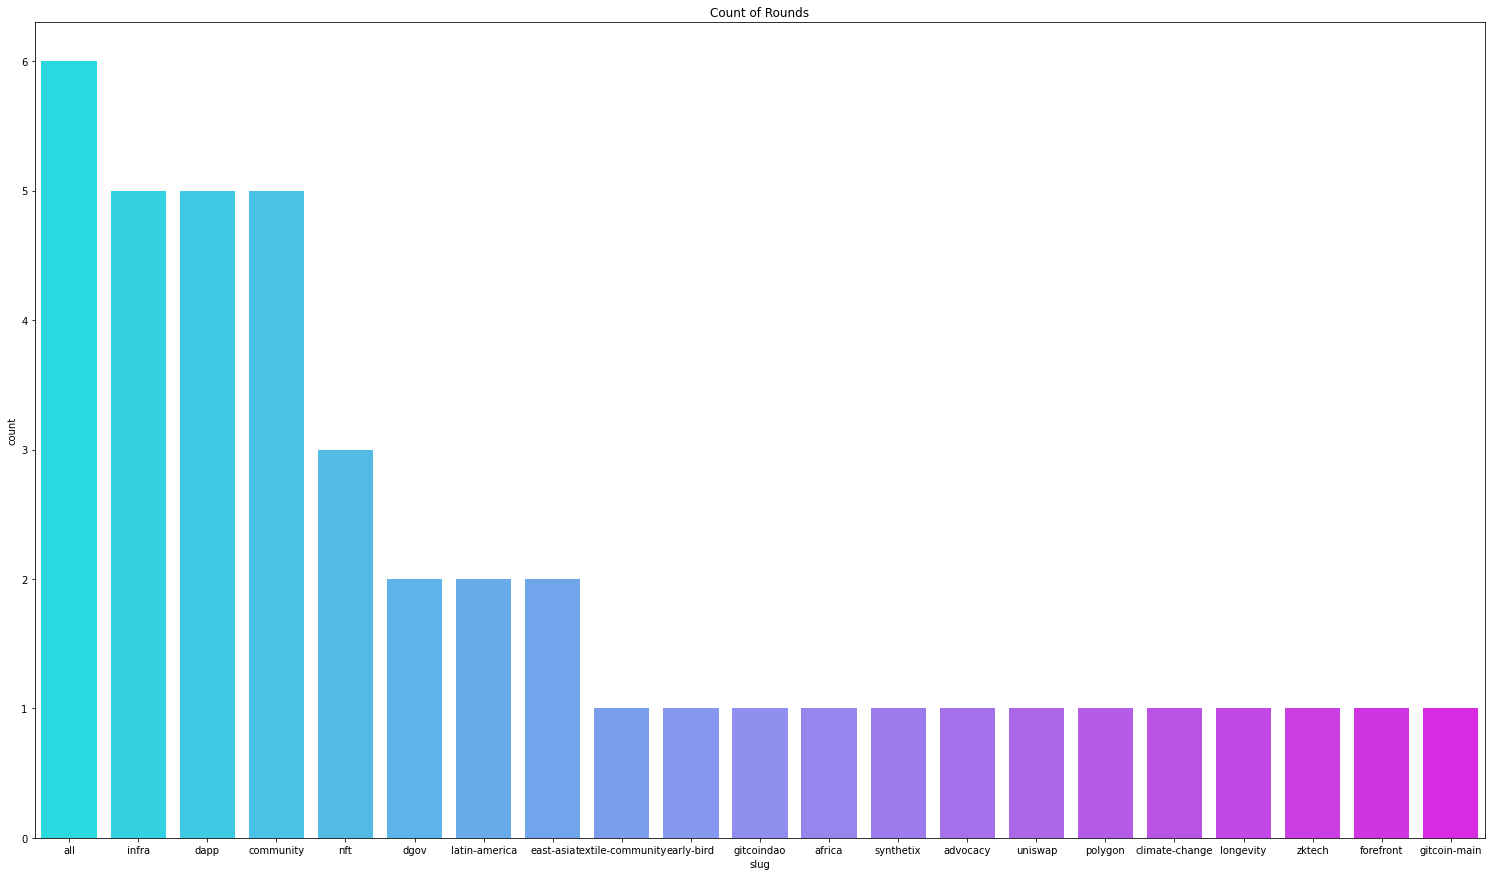

In [3]:
plt.figure(figsize=(26,15))
sns.countplot(rdata.slug, data = rdata, order = rdata.slug.value_counts().index, palette='cool', orient='v')
plt.title('Count of Rounds')

plt.savefig('Count of Rounds.png', format='png')

In [4]:
trace1 = go.Scatter(
                    x = rdata[rdata.slug=='nft'].round_num,
                    y = rdata[rdata.slug=='nft'].total_pot,
                    mode = "lines+markers",
                    name = "nft",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= rdata[rdata.slug=='nft'].id)

trace2 = go.Scatter(
                    x = rdata[rdata.slug=='infra'].round_num,
                    y = rdata[rdata.slug=='infra'].total_pot,
                    mode = "lines+markers",
                    name = "infra",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= rdata[rdata.slug=='infra'].id)

trace3 = go.Scatter(
                    x = rdata[rdata.slug=='community'].round_num,
                    y = rdata[rdata.slug=='community'].total_pot,
                    mode = "lines+markers",
                    name = "community",
                    marker = dict(color = 'rgba(160, 26, 30, 0.8)'),
                    text= rdata[rdata.slug=='community'].id)

trace4 = go.Scatter(
                    x = rdata[rdata.slug=='dapp'].round_num,
                    y = rdata[rdata.slug=='dapp'].total_pot,
                    mode = "lines+markers",
                    name = "dapp",
                    marker = dict(color = 'rgba(160, 160, 30, 0.8)'),
                    text= rdata[rdata.slug=='community'].id)

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Most common categories of Gitcoin Rounds Matching Pools',
              xaxis= dict(title = 'Round', ticklen = 5, zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [5]:
rdata_sum = rdata.groupby('round_num').agg({"total_pot": [np.sum, np.count_nonzero]})


y_saving = rdata_sum[('total_pot','sum')]
y_net_worth  = rdata_sum[('total_pot','count_nonzero')]
x_saving = rdata_sum.index
x_net_worth  = rdata_sum.index

trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Matching Pot',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='Number of Separate Pools',
)
layout = dict(
                title='Matching Pot and Number of Separate Pools',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [6]:
"""
rdata[rdata.sub_round_slug=='nft']

trace1 = go.Bar(
                x = rdata[rdata.sub_round_slug=='nft'].round_num,
                y = rdata[rdata.sub_round_slug=='nft'].total_pot,
                name = "nft",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = rdata[rdata.sub_round_slug=='nft'].total_pot)
# create trace2 
trace2 = go.Bar(
                x = rdata[rdata.sub_round_slug=='infra'].round_num,
                y = rdata[rdata.sub_round_slug=='infra'].total_pot,
                name = "infra",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = rdata[rdata.sub_round_slug=='infra'].total_pot)


data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)"""

'\nrdata[rdata.sub_round_slug==\'nft\']\n\ntrace1 = go.Bar(\n                x = rdata[rdata.sub_round_slug==\'nft\'].round_num,\n                y = rdata[rdata.sub_round_slug==\'nft\'].total_pot,\n                name = "nft",\n                marker = dict(color = \'rgba(255, 174, 255, 0.5)\',\n                             line=dict(color=\'rgb(0,0,0)\',width=1.5)),\n                text = rdata[rdata.sub_round_slug==\'nft\'].total_pot)\n# create trace2 \ntrace2 = go.Bar(\n                x = rdata[rdata.sub_round_slug==\'infra\'].round_num,\n                y = rdata[rdata.sub_round_slug==\'infra\'].total_pot,\n                name = "infra",\n                marker = dict(color = \'rgba(255, 255, 128, 0.5)\',\n                              line=dict(color=\'rgb(0,0,0)\',width=1.5)),\n                text = rdata[rdata.sub_round_slug==\'infra\'].total_pot)\n\n\ndata = [trace1, trace2]\nlayout = go.Layout(barmode = "group")\nfig = go.Figure(data = data, layout = layout)\niplot(fig)'

# Grants Granular Data

In [7]:
data = pd.read_csv('/kaggle/input/grallrounds/Grants Results History Round over Round  Grant over Grant - GR1-GR12.csv').sort_values('round_number').reset_index(drop=True)

def fill_missing_values(df):
    df.total = df.total.apply(lambda x: str(x).replace(',', '').replace('$', '')).astype(float)
    df.crowdfund_amount_contributions_usd = df.crowdfund_amount_contributions_usd.apply(lambda x: str(x).replace('$', '').replace(',', '')).astype(float)
    df.match_amount = df.match_amount.apply(lambda x: str(x).replace('$', '').replace(',', '')).astype(float)
    return df

data = fill_missing_values(data)

data.head(2)

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
0,1,2019-02-01,2019-02-15,ChainID Network,44,undefined,Infra Tech,https://gitcoin.co/grants/44/chainid-network,0.06,1,1,0.1,0.16
1,1,2019-02-01,2019-02-15,Prysm by Prysmatic Labs,24,north_america,Infra Tech,https://gitcoin.co/grants/24/prysm-by-prysmatic-labs,4306.03,12,12,1619.0,5925.03


# NA analysis

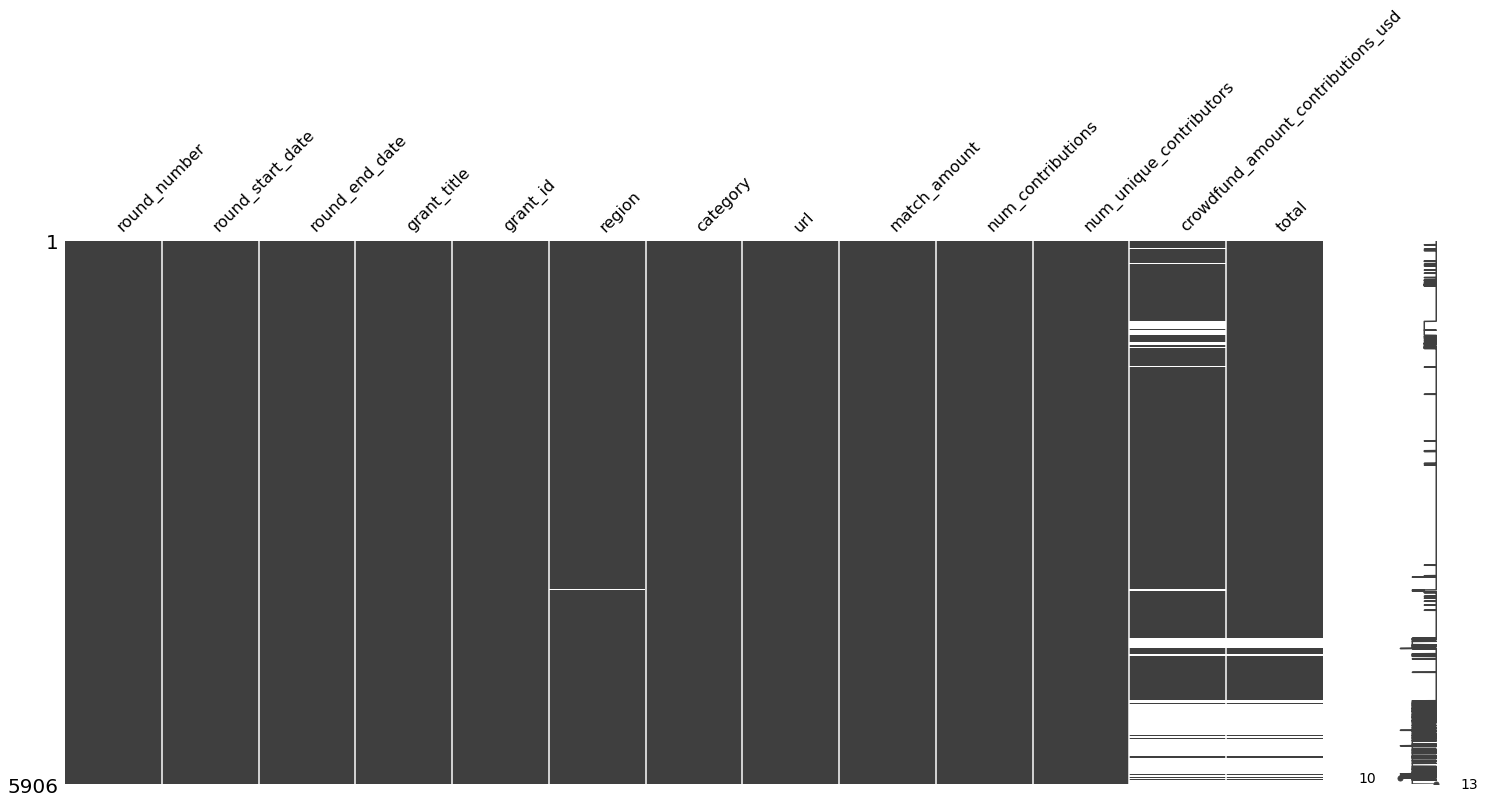

In [8]:
msno.matrix(data)
plt.savefig('MSNO.png', format='png')
plt.show()

In [9]:
data[data.crowdfund_amount_contributions_usd.isna()].describe()

,round_number,grant_id,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
count,1191.000000,1191.000000,1191.00000,1191.000000,1191.0,0.0,261.000000
mean,10.786734,1267.668346,36.33979,1.001679,0.0,NaN,165.826398
std,2.437768,893.676762,628.53794,0.040962,0.0,NaN,1336.639100
min,2.000000,15.000000,0.00000,1.000000,0.0,NaN,0.000000
25%,12.000000,512.500000,0.00000,1.000000,0.0,NaN,0.000000
50%,12.000000,1012.000000,0.00000,1.000000,0.0,NaN,0.000000
75%,12.000000,1889.500000,0.00000,1.000000,0.0,NaN,0.200000
max,12.000000,4305.000000,14768.50000,2.000000,0.0,NaN,14768.500000


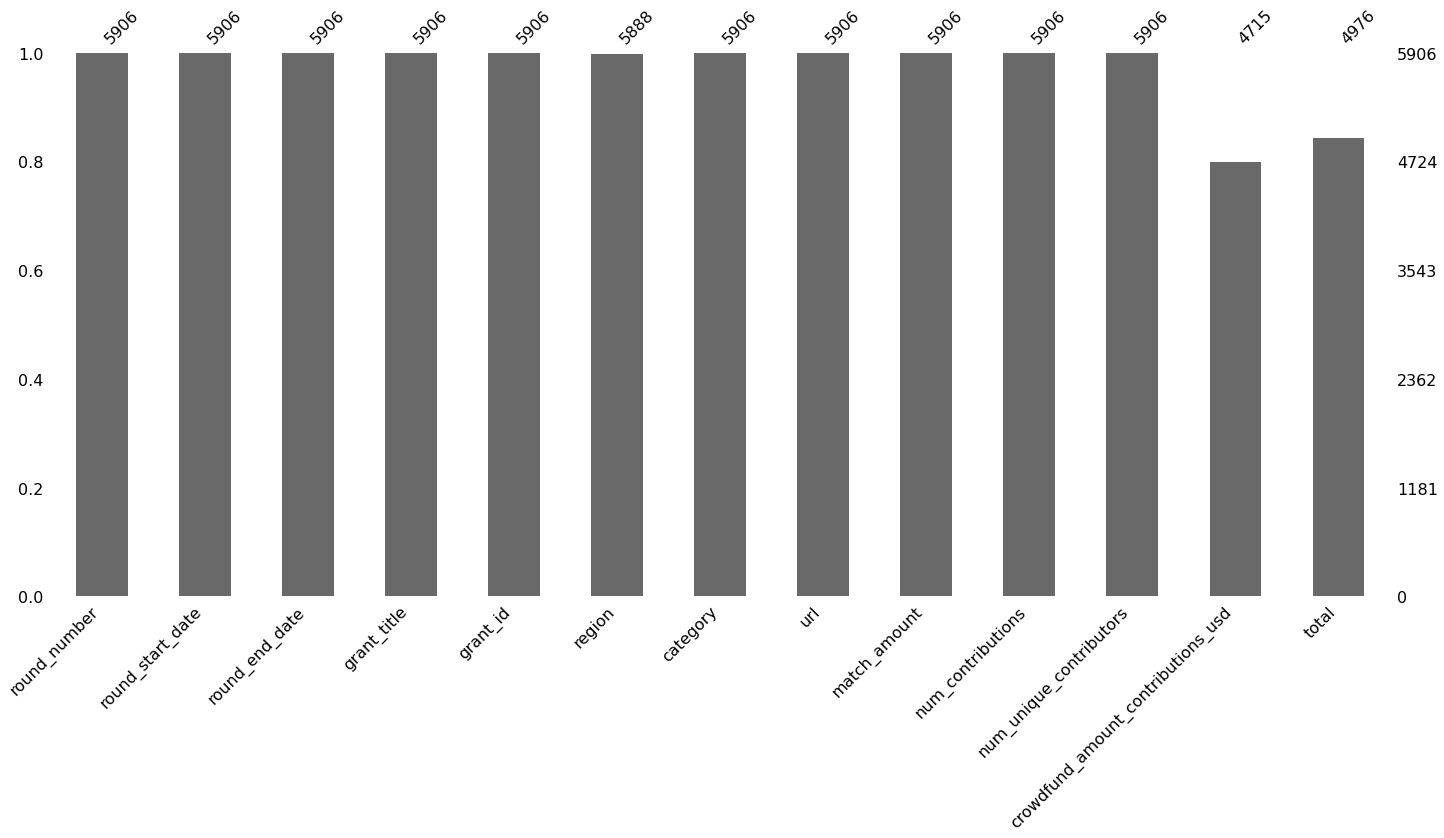

In [10]:
msno.bar(data)
plt.savefig('MSNObar.png', format='png')
plt.show()

In [11]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
missing_data.head(5)

,Missing Ratio
crowdfund_amount_contributions_usd,20.165933
total,15.746698
region,0.304775


In [12]:
data.isnull().sum()

round_number                             0
round_start_date                         0
round_end_date                           0
grant_title                              0
grant_id                                 0
region                                  18
category                                 0
url                                      0
match_amount                             0
num_contributions                        0
num_unique_contributors                  0
crowdfund_amount_contributions_usd    1191
total                                  930
dtype: int64

## Cleaning data

In [13]:
def cleaned_data(d):
    d = d[d.total.notnull()]

    d.region = d.region.fillna('undefined')
    d.crowdfund_amount_contributions_usd = d.crowdfund_amount_contributions_usd.fillna(0)

    abc = d.groupby(['grant_id']).agg(grant_uniq=("grant_title", "nunique"), mode=("grant_title", lambda x:x.value_counts().index[0]))

    for x in abc[abc['grant_uniq']==2].index:
        d.loc[lambda df: df['grant_id'] == x, 'grant_title'] = abc.loc[x, 'mode']
        
    return d.reset_index(drop=True)

data = cleaned_data(data)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# EDA

Number of unique grants

In [14]:
data.grant_title.nunique()

1886

### Adaptation to a better Grant Pool

In [15]:
unique_regions = [ 'north_america', 'oceania', 'europe',
       'latin_america', 'east_asia', 'africa', 'middle_east', 'india',
       'southeast_asia']

def ddd(x):
    i = x.unique()
    for x in i:
        if x in unique_regions:
            return i

    return np.nan

abc = data.groupby('grant_id').agg(num_un_reg=('region', "nunique"),reg=('region', ddd))
print(abc[(abc.num_un_reg>1)&(abc.reg.notna())].shape)
abc[(abc.num_un_reg>1)&(abc.reg.notna())]

(8, 2)


,num_un_reg,reg
grant_id,,
29,2,"[undefined, europe]"
49,2,"[latin_america, undefined]"
185,2,"[none, east_asia]"
806,2,"[undefined, north_america]"
1219,2,"[middle_east, europe]"
2968,2,"[europe, southeast_asia]"
3062,2,"[africa, europe]"
3525,2,"[undefined, latin_america]"


In [16]:
abc = data.groupby('grant_id').agg(num_un_reg=('category', "nunique"),un_reg=('category', "unique"))
print(abc[abc.num_un_reg>1].shape)
abc[abc.num_un_reg>1]

(1, 2)


,num_un_reg,un_reg
grant_id,,
2900,2,"[Building Gitcoin, Community]"


### different Ids but the same grant pattern

These grants are

In [17]:
data.columns

Index(['round_number', 'round_start_date', 'round_end_date', 'grant_title',
       'grant_id', 'region', 'category', 'url', 'match_amount',
       'num_contributions', 'num_unique_contributors',
       'crowdfund_amount_contributions_usd', 'total'],
      dtype='object')

In [18]:
def diff(x):
    return x.max()-x.min()
abc = data.groupby('grant_title').agg({"grant_id": diff})
len(abc[abc.grant_id>0].index)

44

In [19]:
data[data.grant_title.isin(abc[abc.grant_id>0].index)].sort_values(['grant_title','round_number']).head(25)

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
838,6,2020-06-16,2020-07-03,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,53.10,21,18,432.89,486.00
1212,7,2020-09-14,2020-10-02,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,21.22,14,12,666.98,688.20
1784,8,2020-12-01,2020-12-18,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,26.40,80,20,477.06,503.46
1971,9,2021-03-10,2021-03-25,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,2.83,36,35,347.57,350.40
3147,10,2021-06-16,2021-07-02,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,3.64,51,49,448.91,452.54
3958,11,2021-09-08,2021-09-24,1Hive Gardens,3565,none,dGov,https://gitcoin.co/grants/3565/1hive-gardens,47.84,1,0,0.00,47.84
4465,12,2021-12-01,2021-12-16,1Hive Gardens,899,undefined,dApp Tech,https://gitcoin.co/grants/899/1hive-gardens,1381.40,952,919,3544.39,4925.79
1598,8,2020-12-01,2020-12-18,APY Vision,1556,none,dApp Tech,https://gitcoin.co/grants/1556/apy-vision,15524.23,1456,344,18378.35,33902.58
2046,9,2021-03-10,2021-03-25,APY Vision,1556,none,dApp Tech,https://gitcoin.co/grants/1556/apy-vision,13358.84,3053,2512,13635.39,26994.23
3071,10,2021-06-16,2021-07-02,APY Vision,1556,none,dApp Tech,https://gitcoin.co/grants/1556/apy-vision,5276.18,2518,2285,6259.31,11535.50


## 

# EDA Region

In [20]:
data.groupby(['round_number','region']).agg(grant_uniq=("grant_title", "nunique"), total_sum=("total", "sum"), total_mean=("total", "mean"), unique_contributors_mean=("num_unique_contributors", "mean")
                                 ,match_mean=("match_amount", "mean"), mode=("category", lambda x:x.value_counts().index[0]),
                                  crowdsourced_mean=("crowdfund_amount_contributions_usd", "mean")
                                 )

grant_uniq   total_sum    total_mean  \
round_number region                                                 
1            europe                   1      474.30    474.300000   
             none                    16    19114.82   1194.676250   
             north_america            4    11639.37   2909.842500   
             oceania                  1     2105.16   2105.160000   
             undefined                4     5327.45   1331.862500   
...                                 ...         ...           ...   
12           none                    82   160745.19   1960.307195   
             north_america          264  2341628.83   8836.335208   
             oceania                  9    49132.57   5459.174444   
             southeast_asia          20   107379.79   5368.989500   
             undefined              111  1341445.85  12085.097748   

                             unique_contributors_mean   match_mean  \
round_number region                                                  
1            europe                          3.000000   374.300000   
             none                            5.000000   836.831875   
             north_america                   5.500000  1686.712500   
             oceania                         5.000000  1460.160000   
             undefined                       4.250000   757.347500   
...                                               ...          ...   
12           none                           95.768293   560.032439   
             north_america                 368.818868  5117.569585   
             oceania                       517.000000  2555.293333   
             southeast_asia                512.900000  1831.540000   
             undefined                     715.126126  5448.014234   

                                   mode  crowdsourced_mean  
round_number region                                         
1            europe           Community         100.000000  
             none             dApp Tech         357.844375  
             north_america   Infra Tech        1223.130000  
             oceania         Infra Tech         645.000000  
             undefined       Infra Tech         574.515000  
...                                 ...                ...  
12           none             dApp Tech        1400.274756  
             north_america    Community        3718.765849  
             oceania          Community        2903.882222  
             southeast_asia        NFTs        3537.448500  
             undefined        Community        6637.084324  

[111 rows x 7 columns]

# EDA Category


In [21]:
data.category.unique()

array(['Infra Tech', 'Community', 'dApp Tech', 'Building Gitcoin',
       'Health', 'NFTs', 'dGov', 'Crypto for Black Lives', 'APOLLO',
       'Matic: Build-n-Earn', 'Grants Round 12'], dtype=object)

In [22]:
# 8 values for round 6
#data[data.category=='Crypto for Black Lives']

# 1 value for round 7
#data[data.category=='Matic: Build-n-Earn']

# 3 values for round 7
#data[data.category=='APOLLO']

# 29 values 2-8, 10-11
#data[data.category=='Building Gitcoin']

# 45 values from 3-10 
#data[data.category=='Health']

# 87 values 5-12
#data[data.category=='dGov']

# 94 values 12
#data[data.category=='Grants Round 12'].count()

# 434 values 5-12
#data[data.category=='NFTs']

# 938 values 1-12
#data[data.category=='Infra Tech'].round_number.unique()
#data[data.category=='Infra Tech'].count()

# 2128 values 1-12
#data[data.category=='dApp Tech'].round_number.unique()

# 2139 values 1-12
#data[data.category=='Community'].round_number.unique()
#data[data.category=='Community'].count()

In [23]:
gr12 = data[data.round_number==12]
gr11 = data[data.round_number==11]

In [24]:
gr12

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
4094,12,2021-12-01,2021-12-16,Body Gallery,3577,undefined,NFTs,https://gitcoin.co/grants/3577/body-gallery,0.03,5,5,13.68,13.71
4095,12,2021-12-01,2021-12-16,SolTomm,3527,europe,NFTs,https://gitcoin.co/grants/3527/soltomm,0.03,5,5,10.41,10.43
4096,12,2021-12-01,2021-12-16,Fund for NFT art protection,2143,europe,NFTs,https://gitcoin.co/grants/2143/fund-for-nft-art-protection,0.03,7,7,8.62,8.65
4097,12,2021-12-01,2021-12-16,Alas DAO,3395,europe,Community,https://gitcoin.co/grants/3395/alas-dao,0.03,9,8,15.44,15.47
4098,12,2021-12-01,2021-12-16,"Specie, An Impermanent Loss Solution.",3173,undefined,dApp Tech,https://gitcoin.co/grants/3173/specie-an-impermanent-loss-solution,0.03,5,5,15.72,15.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,12,2021-12-01,2021-12-16,Arweave PermPic,3410,north_america,NFTs,https://gitcoin.co/grants/3410/arweave-permpic,0.00,1,1,1.92,1.92
4972,12,2021-12-01,2021-12-16,ETH123.org,1598,east_asia,Community,https://gitcoin.co/grants/1598/eth123org,0.00,1,1,1.10,1.10
4973,12,2021-12-01,2021-12-16,ADOR,438,north_america,dApp Tech,https://gitcoin.co/grants/438/ador,0.00,1,1,1.00,1.00
4974,12,2021-12-01,2021-12-16,Altcoin Author Crypto Podcast/Newsletter - #ETHisMoney Advancement,571,north_america,Community,https://gitcoin.co/grants/571/altcoin-author-crypto-podcastnewsletter-ethismone,0.00,1,1,6.45,6.45


In [25]:
gr12.category.value_counts()

Community          319
dApp Tech          233
Infra Tech         115
NFTs               100
Grants Round 12     89
dGov                26
Name: category, dtype: int64

In [26]:
gr11.groupby('category').match_amount.sum()

category
Building Gitcoin     49823.43
Community           181311.60
Infra Tech          230912.95
NFTs                140427.31
dApp Tech           267051.52
dGov                 60228.46
Name: match_amount, dtype: float64

In [27]:
gr12.groupby('category').match_amount.sum()

category
Community          1336767.34
Grants Round 12     581587.61
Infra Tech          391547.45
NFTs                128935.04
dApp Tech           602007.96
dGov                 49723.74
Name: match_amount, dtype: float64

# By 11 Round comparison between pots

In [28]:
gr11.groupby('category').match_amount.sum()

category
Building Gitcoin     49823.43
Community           181311.60
Infra Tech          230912.95
NFTs                140427.31
dApp Tech           267051.52
dGov                 60228.46
Name: match_amount, dtype: float64

In [29]:
gr11.groupby('region').match_amount.sum()

region
africa             76441.60
east_asia          77888.37
europe            136010.17
india              21233.65
latin_america      94949.62
middle_east         5631.16
none               99688.65
north_america     204442.08
oceania            37333.82
southeast_asia     49653.73
undefined         126482.42
Name: match_amount, dtype: float64

In [30]:
a = gr11.groupby(['region']).agg({"match_amount": [np.mean, np.sum],"total": [np.mean, np.sum], "round_number": np.count_nonzero})

In [31]:
a[('match_amount','sum')] / (a[('total','sum')])

region
africa            0.778355
east_asia         0.341072
europe            0.364336
india             0.363788
latin_america     0.500804
middle_east       0.236351
none              0.448658
north_america     0.371536
oceania           0.619400
southeast_asia    0.602428
undefined         0.313694
dtype: float64

Its clear that oversubsidized is Africa
and Under is Middle East

In [32]:
a2 = gr11.groupby(['category']).agg({"match_amount": [np.mean, np.sum],"total": [np.mean, np.sum], "round_number": np.count_nonzero})

In [33]:
a2[('match_amount','sum')] / (a2[('total','sum')])

category
Building Gitcoin    0.529064
Community           0.371018
Infra Tech          0.404686
NFTs                0.427426
dApp Tech           0.371647
dGov                0.673207
dtype: float64

under is Community and Dapp Tech while over is dGov